In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [2]:
dir = "C:\\Code\\tomato-disease\\training\\Tomato_Images"

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 18

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = dir,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True
)

Found 16011 files belonging to 10 classes.


In [5]:
CLASS_NAMES = dataset.class_names
CLASS_NAMES

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
import os
total = 0
for labels in os.listdir(dir):
    counter = 0
    for file in os.listdir(dir+ f"\\{labels}"):
        counter += 1
    total += counter

total

16012

In [7]:
for images_in_batch, labels_in_batch in dataset.take(1):
    print(images_in_batch[0].numpy())
    print(labels_in_batch[0].numpy().astype("uint8"))

[[[122. 113. 116.]
  [112. 103. 106.]
  [129. 120. 123.]
  ...
  [159. 150. 153.]
  [160. 151. 154.]
  [162. 153. 156.]]

 [[116. 107. 110.]
  [107.  98. 101.]
  [124. 115. 118.]
  ...
  [156. 147. 150.]
  [155. 146. 149.]
  [156. 147. 150.]]

 [[126. 117. 120.]
  [116. 107. 110.]
  [129. 120. 123.]
  ...
  [156. 147. 150.]
  [153. 144. 147.]
  [152. 143. 146.]]

 ...

 [[131. 122. 125.]
  [137. 128. 131.]
  [135. 126. 129.]
  ...
  [154. 148. 152.]
  [155. 149. 153.]
  [156. 150. 154.]]

 [[128. 119. 122.]
  [138. 129. 132.]
  [122. 113. 116.]
  ...
  [153. 147. 151.]
  [155. 149. 153.]
  [157. 151. 155.]]

 [[137. 128. 131.]
  [150. 141. 144.]
  [124. 115. 118.]
  ...
  [152. 146. 150.]
  [155. 149. 153.]
  [158. 152. 156.]]]
7


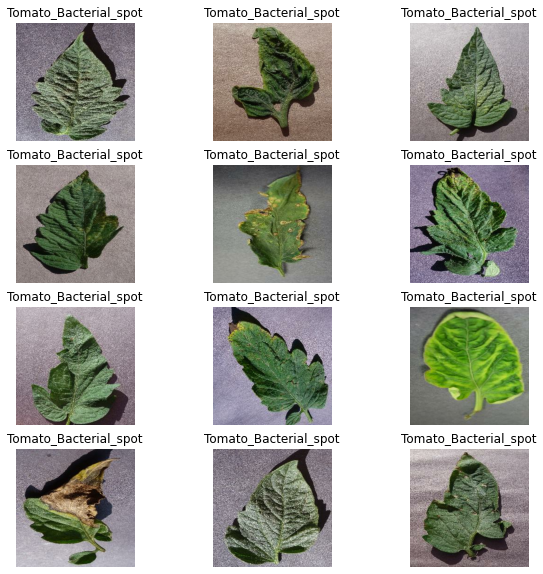

In [8]:
plt.figure(figsize=(10,10))
for images_in_batch, labels_in_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(4,3, i+1)
        plt.imshow(images_in_batch[i].numpy().astype("uint"))
        plt.title(CLASS_NAMES[np.argmax(labels_in_batch[i])])
        plt.axis("off")

In [14]:
def get_dataset_split(dataset, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, shuffle = True, shuffle_size = 10000):
    
    assert(train_ratio + val_ratio + test_ratio) == 1

    if shuffle == True:
        dataset.shuffle(shuffle_size, seed = 12)
    
    dataset_size = len(dataset) # number of batches

    train_size = int(dataset_size*train_ratio)
    val_size = int(dataset_size*val_ratio)
    test_size = int(dataset_size*test_ratio)

    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [15]:
train_ds, val_ds, test_ds = get_dataset_split(dataset)

In [18]:
print("len(train_ds): ", len(train_ds))
print("len(val_ds): ", len(val_ds))
print("len(test_ds): ", len(test_ds))

len(train_ds):  400
len(val_ds):  50
len(test_ds):  51


In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
BATCH_SHAPE = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # (32,256,256,3)
n_classes = len(CLASS_NAMES) # 10

model = models.Sequential([
    layers.experimental.prprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),

    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

    layers.Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape = BATCH_SHAPE),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kerne_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kenel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(n_classes, activation = "softmax")
])